In [ ]:
from typing import Callable, Dict, List, Optional, Tuple, Type, Union
import gym
from gym import spaces, Env
from gym.spaces import Box
import keyboard
import pygame
import numpy as np
from random import randint
from stable_baselines3 import A2C
from stable_baselines3.common.callbacks import CheckpointCallback
from stable_baselines3.common.env_checker import check_env
from matplotlib import pyplot as plt
from stable_baselines3.common.env_util import make_vec_env
import random
import torch as th
import torch.nn as nn
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy
import torch.nn.functional as F
from torch.distributions import Categorical
import matplotlib.pyplot as plt
testEnv = True

In [50]:
class GutsGame(gym.Env):
    def __init__(self):
        # Actions we can take bank, or roll again
        self.action_space = spaces.Discrete(2)
        #  bank and unbanked
        self.observation_space = spaces.Box(0,150,shape=(2,),dtype=np.uint8)
        # Set start value
        self.bank = 0
        self.unbank = 0
        # Set turn
        self.turn = 1000
        
    def step(self, action):
        # Apply action
        # 0: bank
        # 1: roll again
        
        reward = 0
        if action == 1:
            diceRoll1 = random.randint(1, 6)
            diceRoll2 = random.randint(1, 6)
            #print(diceRoll1,diceRoll2)
            if diceRoll1 == 6 and diceRoll2 == 6:
                self.unbank = 0
                self.bank = 0
            elif diceRoll1 == 6 or diceRoll2 == 6:
                self.unbank = 0
            else:
                self.unbank += (diceRoll1 + diceRoll2)
        else:
            self.bank += self.unbank
            self.unbank = 0
        
        # Reduce turn
        self.turn -= 1 
        
        # Check if timer is done or if player won
        if self.turn <= 0 or self.bank >= 100:
            reward = self.turn
            done = True
        else:
            done = False
        
        # Set placeholder for info
        info = {}
        obs = np.array([self.bank,self.unbank]).astype(np.uint8)
        # Return step information
        return obs, reward, done, info

    def render(self):
        pass
    
    def reset(self):
        # Reset start value
        self.bank = 0
        self.unbank = 0
        obs = np.array([self.bank,self.unbank]).astype(np.uint8)
        #print(np.shape(obs))
        # Reset time
        self.turn = 1000
        return obs
env = GutsGame()
check_env(env)
print("passed Check_env")

passed Check_env


In [24]:
device = "cpu"

model = A2C("MlpPolicy", env, device=device, verbose=1)
#print(model.policy)

save_directory = './ML/GameOfGuts'
numberOfCheckpoints = 10
totalTimeSteps = 25000
checkpoint_callback = CheckpointCallback(save_freq=totalTimeSteps/numberOfCheckpoints, save_path=save_directory,
                                         name_prefix='GutBot')

#model.learn(total_timesteps=totalTimeSteps,callback=checkpoint_callback) 
model = model.load("ML/GameofGuts/GutBot_50000_stepsA2C")

obs = env.reset()
#print(obs)
total = []
totalReward = 0

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


FileNotFoundError: [Errno 2] No such file or directory: 'ML\\GameofGuts\\GutBot_50000_stepsA2C.zip'

In [41]:
def algorthim(obs,num):
    if(obs[0] + obs[1] >= 100):
        return 1
    
    if(obs[1] < num):
        return 1
    return 0

In [25]:

obs = env.reset()
#print(obs)
total = []
totalReward = 0

x = []
y = []


In [57]:
i = 0
for num in range(99):
    while i < 100:
        #action, _states = model.predict(obs, deterministic=True)
        #action = int(input())
        #print(action)
        action = algorthim(obs,num)
        
        obs, reward, done, info = env.step(action)
        #print(obs["board"].reshape(10,10))
        #env.render()
        #print(obs)
        if done:
            i += 1
            reward = 1000 - reward
            print(f"{reward} turns left")
            total.append(reward)
            obs = env.reset()
            reward = 0

    x.append(num)
    y.append(np.mean(total))
    print(num,1000-np.mean(total))
    
    

82 turns left
38 turns left
58 turns left
36 turns left
86 turns left
49 turns left
43 turns left
128 turns left
77 turns left
33 turns left
34 turns left
32 turns left
40 turns left
89 turns left
59 turns left
53 turns left
60 turns left
32 turns left
59 turns left
68 turns left
31 turns left
29 turns left
78 turns left
39 turns left
104 turns left
65 turns left
38 turns left
108 turns left
27 turns left
141 turns left
67 turns left
83 turns left
32 turns left
30 turns left
42 turns left
37 turns left
84 turns left
58 turns left
37 turns left
58 turns left
34 turns left
48 turns left
48 turns left
42 turns left
29 turns left
35 turns left
32 turns left
44 turns left
63 turns left
49 turns left
44 turns left
52 turns left
32 turns left
94 turns left
46 turns left
238 turns left
59 turns left
33 turns left
37 turns left
111 turns left
105 turns left
159 turns left
76 turns left
34 turns left
44 turns left
41 turns left
35 turns left
65 turns left
127 turns left
101 turns left
55 turns l

In [37]:
print(x[0],y[0])


1 104.0


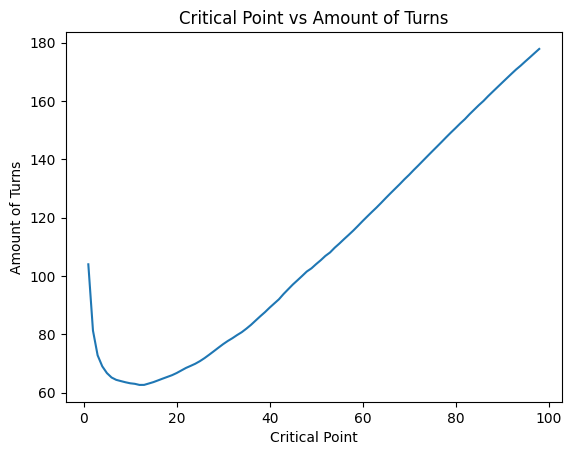

In [38]:

plt.plot(x,y)

# naming the x axis
plt.xlabel('Critical Point')
# naming the y axis
plt.ylabel('Amount of Turns')
  
# giving a title to my graph
plt.title('Critical Point vs Amount of Turns')
  
# function to show the plot
plt.show()

12 62.668756027000995


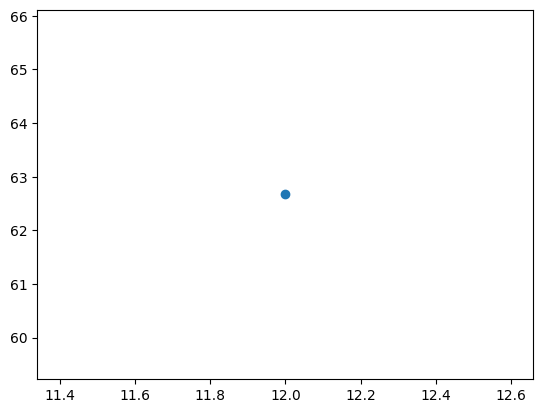

In [29]:
i = np.argmin(y)
x_min = x[i]
y_min = y[i]
plt.plot(x_min, y_min, marker='o')
print(x_min,y_min)